In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
redwine = pd.read_csv(r"C:\Users\damla\OneDrive\Masaüstü\MakineÖğrenmesiProje\winequality-red.csv")

In [3]:
whitewine = pd.read_csv(r"C:\Users\damla\OneDrive\Masaüstü\MakineÖğrenmesiProje\winequality-white.csv")

In [4]:
redwine.head().T, whitewine.head().T

(                            0        1       2       3        4
 fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
 volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
 citric acid            0.0000   0.0000   0.040   0.560   0.0000
 residual sugar         1.9000   2.6000   2.300   1.900   1.9000
 chlorides              0.0760   0.0980   0.092   0.075   0.0760
 free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
 total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
 density                0.9978   0.9968   0.997   0.998   0.9978
 pH                     3.5100   3.2000   3.260   3.160   3.5100
 sulphates              0.5600   0.6800   0.650   0.580   0.5600
 alcohol                9.4000   9.8000   9.800   9.800   9.4000
 quality                5.0000   5.0000   5.000   6.000   5.0000,
                             0        1        2         3         4
 fixed acidity           7.000    6.300   8.1000    7.2000    7.2000
 volatile acidit

In [5]:
redwine['wine_type'] = 'red'
whitewine['wine_type'] = 'white'

# İki Veri Setini Birleştirme

In [6]:
wine = pd.concat([redwine, whitewine], axis=0)

# Veri Setinin Genel Bilgileri

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [9]:
print(wine.shape)

(6497, 13)


In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


# Eksik Değer Kontrolü

In [11]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

# İstatiksel Özet

In [12]:
print(wine.describe().T)

                       count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%      

# Hedef Değişkeni Ayırma (Quality)

In [13]:
X = wine.drop(['quality', 'wine_type'], axis=1)
y_quality = wine['quality'] 

In [14]:
y_quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [15]:
wine['wine_type'] = wine['wine_type'].map({'red': 0, 'white': 1})

# Alkol içeriği dağılım Grafiği

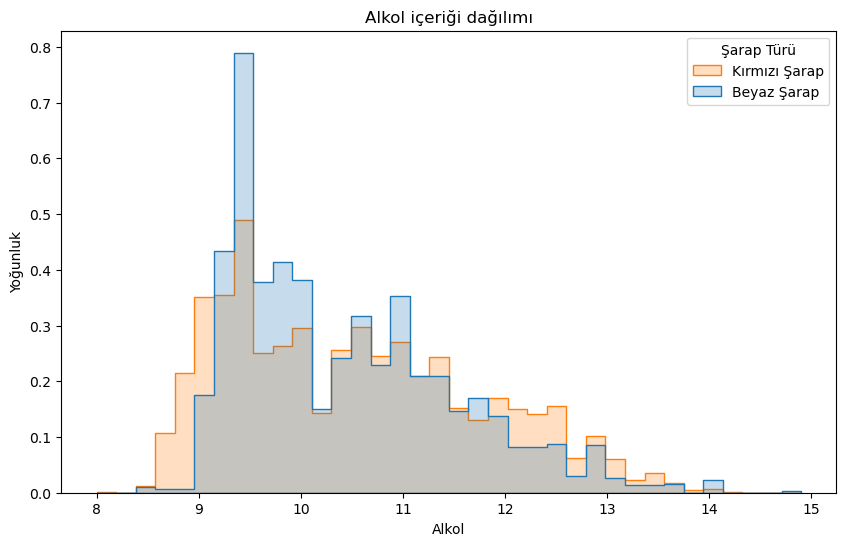

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=wine, x='alcohol', hue='wine_type', element='step', stat='density', common_norm=False)
plt.title('Alkol içeriği dağılımı')
plt.xlabel('Alkol')
plt.ylabel('Yoğunluk')
plt.legend(title='Şarap Türü', labels=['Kırmızı Şarap', 'Beyaz Şarap'])
plt.show()

C:\Users\damla\AppData\Local\Temp\ipykernel_6496\3522191133.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_color('blue')
C:\Users\damla\AppData\Local\Temp\ipykernel_6496\3522191133.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1].set_color('orange')


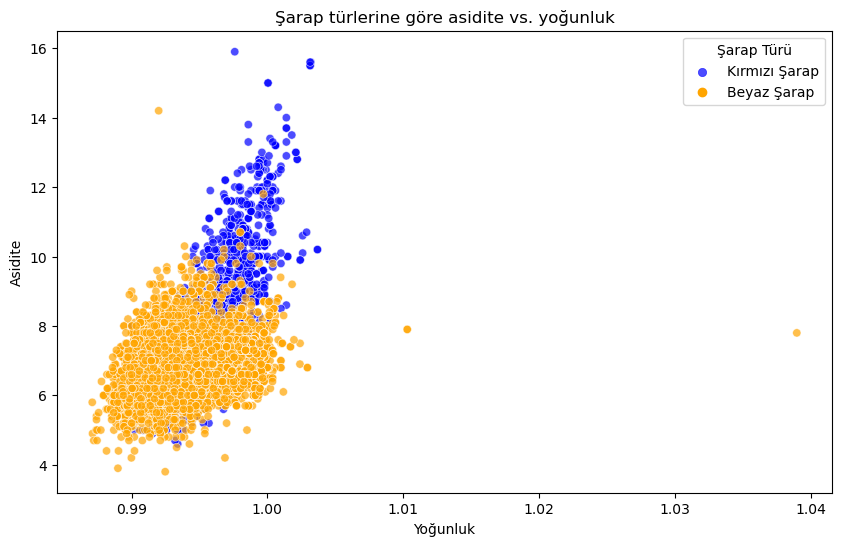

In [18]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='density', y='fixed acidity', hue='wine_type', data=wine, alpha=0.7, palette=['blue', 'orange'])
plt.title('Şarap türlerine göre asidite vs. yoğunluk')
plt.xlabel('Yoğunluk')
plt.ylabel('Asidite')
scatter_plot.legend(title='Şarap Türü', labels=['Kırmızı Şarap', 'Beyaz Şarap'], loc='upper right')
legend = scatter_plot.get_legend()
legend.legendHandles[0].set_color('blue')
legend.legendHandles[1].set_color('orange')
plt.show()


# Şarap Türüne Göre pH dağılım Grafiği

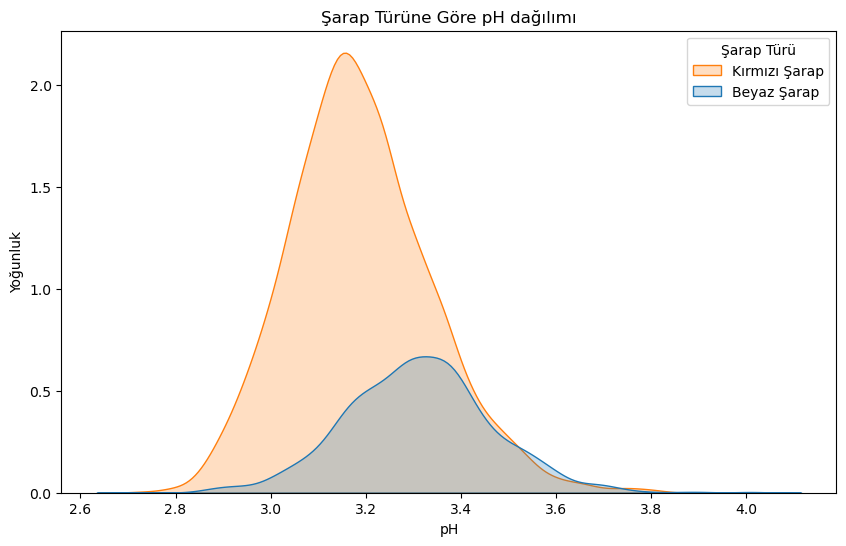

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=wine, x='pH', hue='wine_type', fill=True)
plt.title('Şarap Türüne Göre pH dağılımı')
plt.xlabel('pH')
plt.ylabel('Yoğunluk')
plt.legend(title='Şarap Türü', labels=['Kırmızı Şarap', 'Beyaz Şarap'], loc='upper right')
plt.show()

# Korelasyon Matrisi

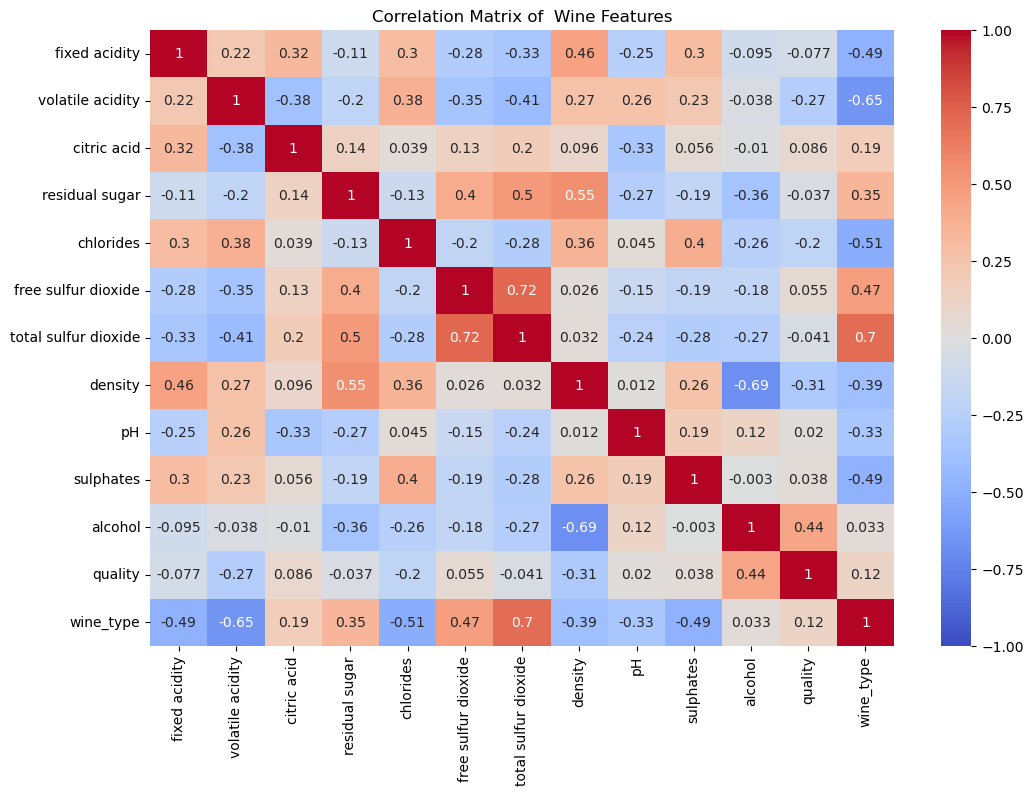

In [23]:
correlation_matrix = wine.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of  Wine Features')
plt.show()

# Quality(Kalite) ve Alcohol(Alkol) Arasındaki İlişki Grafiği

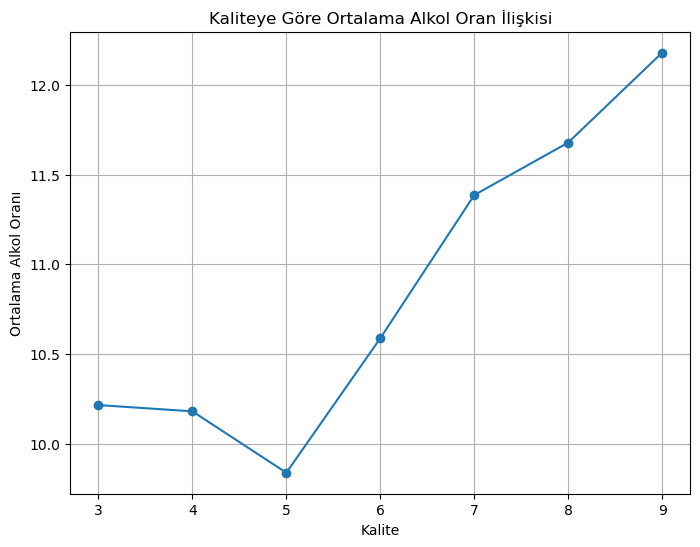

In [24]:
alcohol_means = wine.groupby('quality')['alcohol'].mean()

plt.figure(figsize=(8, 6))
plt.plot(alcohol_means.index, alcohol_means.values, marker='o', linestyle='-')

plt.title('Kaliteye Göre Ortalama Alkol Oran İlişkisi')
plt.xlabel('Kalite')
plt.ylabel('Ortalama Alkol Oranı')

plt.grid(True)
plt.show()

# Quality(Kalite) ve Density(Yoğunluk) Arasındaki İlişki Grafiği

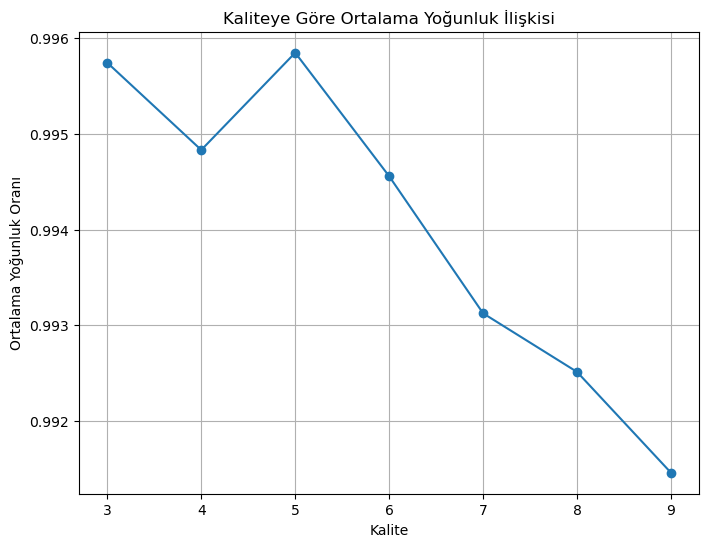

In [25]:
density_means = wine.groupby('quality')['density'].mean()

plt.figure(figsize=(8, 6))
plt.plot(density_means.index, density_means.values, marker='o', linestyle='-')

plt.title('Kaliteye Göre Ortalama Yoğunluk İlişkisi')
plt.xlabel('Kalite')
plt.ylabel('Ortalama Yoğunluk Oranı')

plt.grid(True)
plt.show()

# Quality(Kalite) ve pH Arasındaki İlişki Grafiği

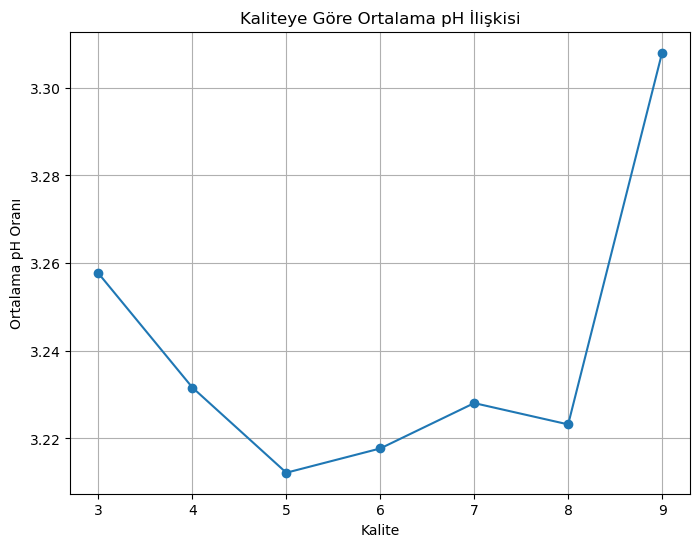

In [26]:
pH_means = wine.groupby('quality')['pH'].mean()

plt.figure(figsize=(8, 6))
plt.plot(pH_means.index, pH_means.values, marker='o', linestyle='-')

plt.title('Kaliteye Göre Ortalama pH İlişkisi')
plt.xlabel('Kalite')
plt.ylabel('Ortalama pH Oranı')

plt.grid(True)
plt.show()

# Wine Type (Tür) ve Free Sulfur Dioxide (Serbest Kükürt Dioksit) Arasındaki İlişki Grafiği

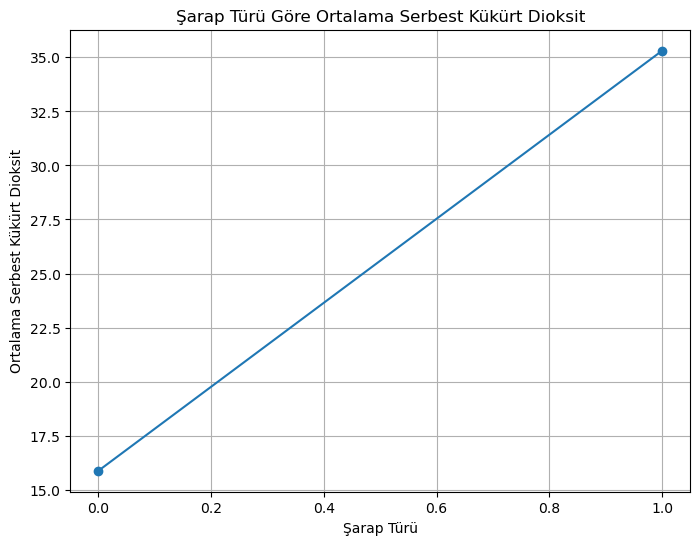

In [27]:
# Kaliteleri gruplayarak volatile acidity'nin ortalamasını hesaplayın
Free_Sulfur_Dioxide_means = wine.groupby('wine_type')['free sulfur dioxide'].mean()

# Çizgi grafiği oluşturun
plt.figure(figsize=(8, 6))
plt.plot(Free_Sulfur_Dioxide_means.index, Free_Sulfur_Dioxide_means.values, marker='o', linestyle='-')

# Grafik başlığı ve etiketleri
plt.title('Şarap Türü Göre Ortalama Serbest Kükürt Dioksit')
plt.xlabel('Şarap Türü')
plt.ylabel('Ortalama Serbest Kükürt Dioksit')

# Grafiği göster
plt.grid(True)
plt.show()


# Tür ve Volatile Acidity (Uçucu Asitlik) Arasındaki İlişki Grafiği

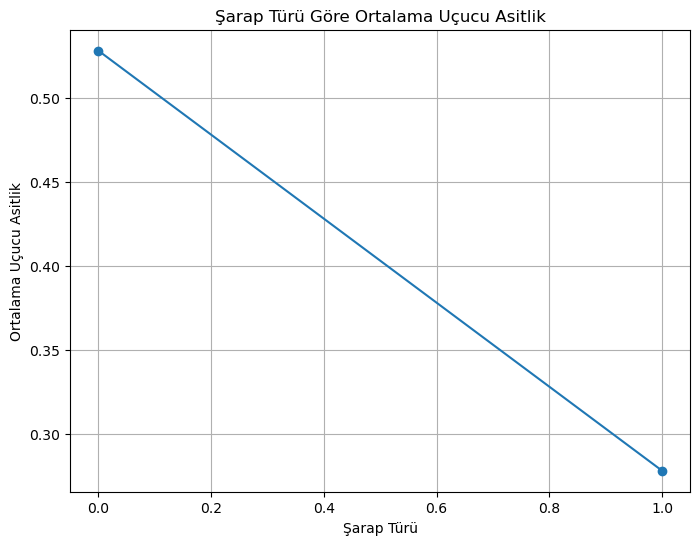

In [28]:
# Kaliteleri gruplayarak volatile acidity'nin ortalamasını hesaplayın
volatile_acidity_means = wine.groupby('wine_type')['volatile acidity'].mean()

# Çizgi grafiği oluşturun
plt.figure(figsize=(8, 6))
plt.plot(volatile_acidity_means.index, volatile_acidity_means.values, marker='o', linestyle='-')

# Grafik başlığı ve etiketleri
plt.title('Şarap Türü Göre Ortalama Uçucu Asitlik')
plt.xlabel('Şarap Türü')
plt.ylabel('Ortalama Uçucu Asitlik')

# Grafiği göster
plt.grid(True)
plt.show()


# Tür ve Alcohol(Alkol) Arasındaki İlişki Grafiği

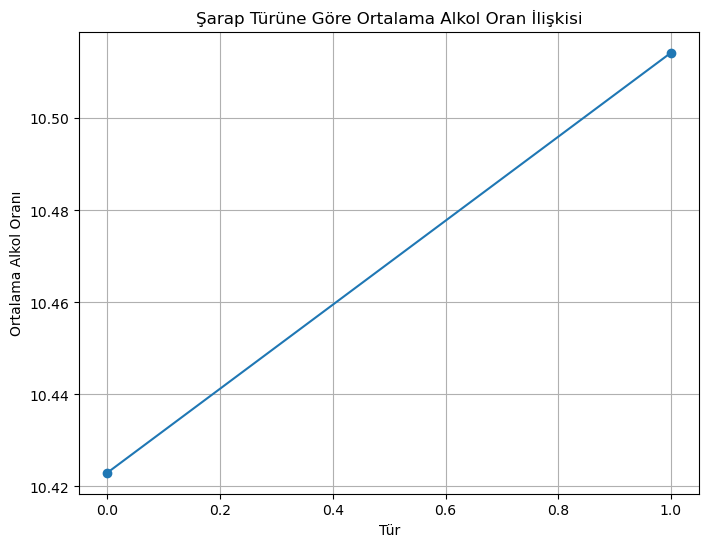

In [29]:
alcohol_means = wine.groupby('wine_type')['alcohol'].mean()

plt.figure(figsize=(8, 6))
plt.plot(alcohol_means.index, alcohol_means.values, marker='o', linestyle='-')

plt.title('Şarap Türüne Göre Ortalama Alkol Oran İlişkisi')
plt.xlabel('Tür')
plt.ylabel('Ortalama Alkol Oranı')

plt.grid(True)
plt.show()

# Quality'nin Sınıflara Ayrılması

In [30]:
bins = [0, 5.5, 7.5, 10] # 3-5 arası düşük, 6-7 arası orta, 8-9 arası yüksek
labels = [0, 1, 2]
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=labels)

# Şarap türüne göre kalitenin dağılım Grafiği

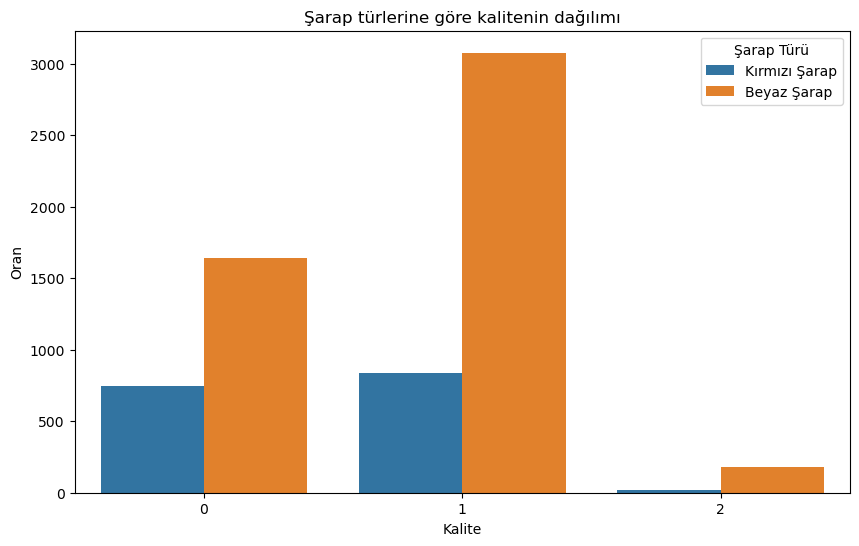

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='wine_type', data=wine)
plt.title('Şarap türlerine göre kalitenin dağılımı')
plt.xlabel('Kalite')
plt.ylabel('Oran')
plt.legend(title='Şarap Türü', labels=['Kırmızı Şarap', 'Beyaz Şarap'])
plt.show()

# Test-Train Aşaması

In [33]:
X_train_quality, X_test_quality, y_train_quality, y_test_quality = train_test_split(X, y_quality, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_quality = scaler.fit_transform(X_train_quality)
X_test_quality = scaler.transform(X_test_quality)

# Logistic Regression Model

In [35]:
model_quality = LogisticRegression()
model_quality.fit(X_train_quality, y_train_quality)

C:\Users\damla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred_quality = model_quality.predict(X_test_quality)

In [37]:
accuracy_quality = accuracy_score(y_test_quality, y_pred_quality)
report_quality = classification_report(y_test_quality, y_pred_quality)
conf_matrix_quality = confusion_matrix(y_test_quality, y_pred_quality)

C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print("Quality Prediction Accuracy:", accuracy_quality)
print("Quality Classification Report:\n", report_quality)
print("Quality Confusion Matrix:\n", conf_matrix_quality)

Quality Prediction Accuracy: 0.536923076923077
Quality Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.69      0.60       597
           7       0.51      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300

Quality Confusion Matrix:
 [[  1   0   3   2   0   0   0]
 [  0   0  28  15   0   0   0]
 [  0   0 245 152   5   0   0]
 [  0   0 162 409  26   0   0]
 [  0   0  18 154  43   0   0]
 [  0   0   1  25  10   0   0]
 [  0   0   0   0   1   0   0]]


In [39]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_quality, y_train_quality)


C:\Users\damla\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarnin

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [40]:
print("Quality Prediction Accuracy:", accuracy_quality)
print("Quality Classification Report:\n", report_quality)
print("Quality Confusion Matrix:\n", conf_matrix_quality)

Quality Prediction Accuracy: 0.536923076923077
Quality Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.69      0.60       597
           7       0.51      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300

Quality Confusion Matrix:
 [[  1   0   3   2   0   0   0]
 [  0   0  28  15   0   0   0]
 [  0   0 245 152   5   0   0]
 [  0   0 162 409  26   0   0]
 [  0   0  18 154  43   0   0]
 [  0   0   1  25  10   0   0]
 [  0   0   0   0   1   0   0]]


# Decision Tree Classifier

In [41]:
model_quality = DecisionTreeClassifier(random_state=42)
model_quality.fit(X_train_quality, y_train_quality)

DecisionTreeClassifier(random_state=42)

In [42]:
scaler = StandardScaler()
X_train_quality = scaler.fit_transform(X_train_quality)
X_test_quality = scaler.transform(X_test_quality)

In [43]:
y_pred_quality = model_quality.predict(X_test_quality)

In [44]:
accuracy_quality = accuracy_score(y_test_quality, y_pred_quality)
report_quality = classification_report(y_test_quality, y_pred_quality)
conf_matrix_quality = confusion_matrix(y_test_quality, y_pred_quality)

C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
print("Quality Prediction Accuracy:", accuracy_quality)
print("Quality Classification Report:\n", report_quality)
print("Quality Confusion Matrix:\n", conf_matrix_quality)

Quality Prediction Accuracy: 0.5946153846153847
Quality Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.60      0.68      0.64       402
           6       0.67      0.59      0.63       597
           7       0.54      0.58      0.56       215
           8       0.33      0.36      0.35        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.34      0.35      0.34      1300
weighted avg       0.60      0.59      0.59      1300

Quality Confusion Matrix:
 [[  0   0   2   3   1   0   0]
 [  1   9  18  13   1   1   0]
 [  2  12 274  92  18   4   0]
 [  3  18 136 352  74  14   0]
 [  0   2  21  60 125   7   0]
 [  0   1   2   8  12  13   0]
 [  0   0   0   1   0   0   0]]


In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Bölme kriteri
    'max_depth': [None, 3, 5, 7, 10],  # Ağaç derinliği
    'min_samples_split': [2, 5, 10],  # Minimum örnek bölme sayısı
    'min_samples_leaf': [1, 2, 4]  # Minimum yaprak örneği sayısı
}

In [47]:
grid_search_quality_dt = GridSearchCV(estimator=model_quality, param_grid=param_grid, cv=3)
grid_search_quality_dt.fit(X_train_quality, y_train_quality)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [48]:
print("Quality Prediction Accuracy:", accuracy_quality)
print("Quality Classification Report:\n", report_quality)
print("Quality Confusion Matrix:\n", conf_matrix_quality)

Quality Prediction Accuracy: 0.5946153846153847
Quality Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.60      0.68      0.64       402
           6       0.67      0.59      0.63       597
           7       0.54      0.58      0.56       215
           8       0.33      0.36      0.35        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.34      0.35      0.34      1300
weighted avg       0.60      0.59      0.59      1300

Quality Confusion Matrix:
 [[  0   0   2   3   1   0   0]
 [  1   9  18  13   1   1   0]
 [  2  12 274  92  18   4   0]
 [  3  18 136 352  74  14   0]
 [  0   2  21  60 125   7   0]
 [  0   1   2   8  12  13   0]
 [  0   0   0   1   0   0   0]]


# Random Forest Classifier

In [49]:
model_quality_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_quality_rf.fit(X_train_quality, y_train_quality)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_quality_rf = model_quality_rf.predict(X_test_quality)

In [51]:
accuracy_quality_rf = accuracy_score(y_test_quality, y_pred_quality_rf)
report_quality_rf = classification_report(y_test_quality, y_pred_quality_rf)
conf_matrix_quality_rf = confusion_matrix(y_test_quality, y_pred_quality_rf)

C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print("Quality Prediction Accuracy (Random Forest):", accuracy_quality_rf)
print("Quality Classification Report (Random Forest):\n", report_quality_rf)
print("Quality Confusion Matrix (Random Forest):\n", conf_matrix_quality_rf)

Quality Prediction Accuracy (Random Forest): 0.6692307692307692
Quality Classification Report (Random Forest):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.66      0.75      0.70       597
           7       0.70      0.55      0.61       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.39      1300
weighted avg       0.67      0.67      0.66      1300

Quality Confusion Matrix (Random Forest):
 [[  0   0   2   4   0   0   0]
 [  1   5  23  14   0   0   0]
 [  0   1 286 111   4   0   0]
 [  0   1 111 449  36   0   0]
 [  0   0   3  93 118   1   0]
 [  0   0   0  14  10  12   0]
 [  0   0   0   0   1   0   0]]


In [53]:
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Ağaç sayısı
    'max_depth': [None, 3, 5, 7],  # Ağaç derinliği
    'min_samples_split': [2, 5, 10],  # Minimum örnek bölme sayısı
    'min_samples_leaf': [1, 2, 4]  # Minimum yaprak örneği sayısı
}

In [55]:
grid_search_quality_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3)
grid_search_quality_rf.fit(X_train_quality, y_train_quality)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [56]:
print("Quality Prediction Accuracy (Random Forest):", accuracy_quality_rf)
print("Quality Classification Report (Random Forest):\n", report_quality_rf)
print("Quality Confusion Matrix (Random Forest):\n", conf_matrix_quality_rf)

Quality Prediction Accuracy (Random Forest): 0.6692307692307692
Quality Classification Report (Random Forest):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.66      0.75      0.70       597
           7       0.70      0.55      0.61       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.39      1300
weighted avg       0.67      0.67      0.66      1300

Quality Confusion Matrix (Random Forest):
 [[  0   0   2   4   0   0   0]
 [  1   5  23  14   0   0   0]
 [  0   1 286 111   4   0   0]
 [  0   1 111 449  36   0   0]
 [  0   0   3  93 118   1   0]
 [  0   0   0  14  10  12   0]
 [  0   0   0   0   1   0   0]]


# Gradient Boosting Classifier

In [57]:
model_quality_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_quality_gb.fit(X_train_quality, y_train_quality)

GradientBoostingClassifier(random_state=42)

In [58]:
y_pred_quality_gb = model_quality_gb.predict(X_test_quality)

In [59]:
accuracy_quality_gb = accuracy_score(y_test_quality, y_pred_quality_gb)
report_quality_gb = classification_report(y_test_quality, y_pred_quality_gb)
conf_matrix_quality_gb = confusion_matrix(y_test_quality, y_pred_quality_gb)

In [60]:
print("Quality Prediction Accuracy (Gradient Boosting):", accuracy_quality_gb)
print("Quality Classification Report (Gradient Boosting):\n", report_quality_gb)
print("Quality Confusion Matrix (Gradient Boosting):\n", conf_matrix_quality_gb)

Quality Prediction Accuracy (Gradient Boosting): 0.5846153846153846
Quality Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           3       0.17      0.17      0.17         6
           4       0.17      0.05      0.07        43
           5       0.59      0.62      0.60       402
           6       0.59      0.71      0.64       597
           7       0.61      0.37      0.46       215
           8       0.50      0.14      0.22        36
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.37      0.29      0.31      1300
weighted avg       0.57      0.58      0.57      1300

Quality Confusion Matrix (Gradient Boosting):
 [[  1   0   2   2   1   0   0]
 [  1   2  26  14   0   0   0]
 [  2   5 248 139   7   1   0]
 [  2   4 132 425  32   2   0]
 [  0   0  12 121  79   2   1]
 [  0   1   0  19  11   5   0]
 [  0   0   0   1   0   0   0]]


In [61]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Ağaç sayısı
    'learning_rate': [0.01, 0.1, 0.2],  # Öğrenme oranı
    'max_depth': [3, 4, 5]  # Ağaç derinliği
}

In [62]:
grid_search_quality = GridSearchCV(estimator=model_quality_gb, param_grid=param_grid, cv=3)
grid_search_quality.fit(X_train_quality, y_train_quality)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [63]:
print("Quality Prediction Accuracy (Gradient Boosting):", accuracy_quality_gb)
print("Quality Classification Report (Gradient Boosting):\n", report_quality_gb)
print("Quality Confusion Matrix (Gradient Boosting):\n", conf_matrix_quality_gb)

Quality Prediction Accuracy (Gradient Boosting): 0.5846153846153846
Quality Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           3       0.17      0.17      0.17         6
           4       0.17      0.05      0.07        43
           5       0.59      0.62      0.60       402
           6       0.59      0.71      0.64       597
           7       0.61      0.37      0.46       215
           8       0.50      0.14      0.22        36
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1300
   macro avg       0.37      0.29      0.31      1300
weighted avg       0.57      0.58      0.57      1300

Quality Confusion Matrix (Gradient Boosting):
 [[  1   0   2   2   1   0   0]
 [  1   2  26  14   0   0   0]
 [  2   5 248 139   7   1   0]
 [  2   4 132 425  32   2   0]
 [  0   0  12 121  79   2   1]
 [  0   1   0  19  11   5   0]
 [  0   0   0   1   0   0   0]]


# Her model için en iyi parametreler ve en iyi skor

In [64]:
models_grid = {'Logistic Regression': grid_search, 'Decision Tree': grid_search_quality_dt, 'Random Forest': grid_search_quality_rf,  'Gradient Boosting': grid_search_quality}

for name, model in models_grid.items():
    print(f"Model: {name}")
    print("Best Parameters:", model.best_params_)
    print("Best Score:", model.best_score_)
    print("------------------------------------------")

Model: Logistic Regression
Best Parameters: {'C': 10, 'solver': 'saga'}
Best Score: 0.5483949063448582
------------------------------------------
Model: Decision Tree
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.5605160567829929
------------------------------------------
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score: 0.648451447626942
------------------------------------------
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best Score: 0.6263233691680803
------------------------------------------


# 4 Modelin Karşılaştırılması

In [65]:
best_models = {name: model.best_estimator_ for name, model in models_grid.items()}

In [66]:
predictions = {name: model.predict(X_test_quality) for name, model in best_models.items()}

In [67]:
for name, y_pred in predictions.items():
    print("------------------------------------------")
    print(f"Model: {name}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_quality, y_pred_quality)
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test_quality, y_pred_quality))
    print("------------------------------------------")

------------------------------------------
Model: Logistic Regression

Confusion Matrix:
[[  0   0   2   3   1   0   0]
 [  1   9  18  13   1   1   0]
 [  2  12 274  92  18   4   0]
 [  3  18 136 352  74  14   0]
 [  0   2  21  60 125   7   0]
 [  0   1   2   8  12  13   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.21      0.21      0.21        43
           5       0.60      0.68      0.64       402
           6       0.67      0.59      0.63       597
           7       0.54      0.58      0.56       215
           8       0.33      0.36      0.35        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.34      0.35      0.34      1300
weighted avg       0.60      0.59      0.59      1300

------------------------------------------
-----------------------------

C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\damla\anaconda3\Lib\site-packages\sklearn\metr

# Modellerin Accuracy Score Karşılaştırma Grafiği

In [68]:
models_names = list(predictions.keys())

In [69]:
accuracy_scores = [accuracy_score(y_test_quality, predictions[model]) for model in models_names]

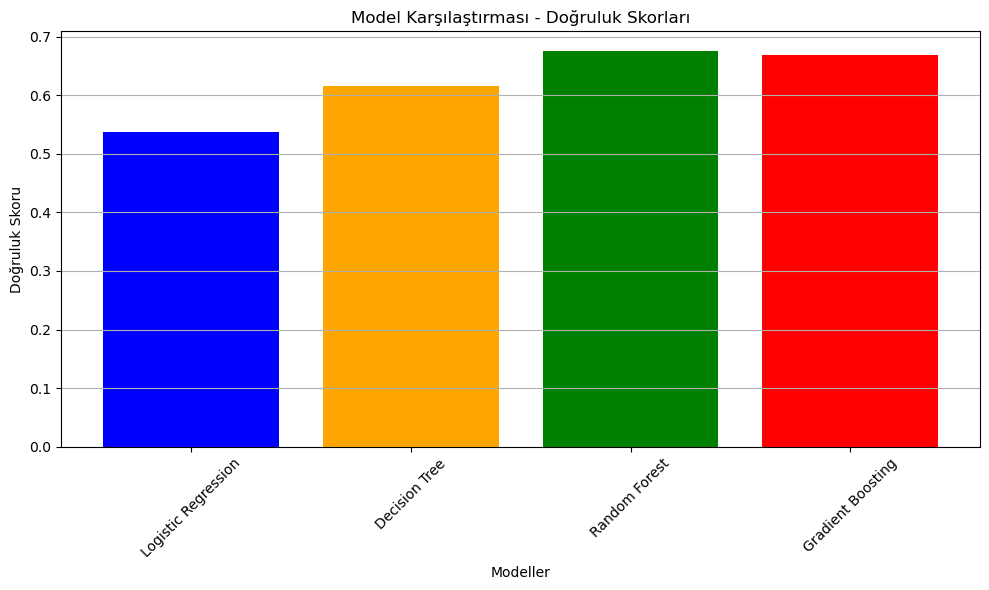

In [70]:
# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(models_names, accuracy_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('Doğruluk Skoru')
plt.title('Model Karşılaştırması - Doğruluk Skorları')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Grafik öğelerini sıkıştırır
plt.show()